In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,recall_score,precision_score,f1_score
import math
from sklearn.model_selection import cross_val_score,learning_curve,train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [2]:
#Read Data
datadf=pd.read_csv("credit_train.csv")


### Dropping Features

In [3]:
datadf = datadf.drop(columns=['Customer ID','Loan ID'])

#### Correlation Check

In [4]:
# Function of Correlation
def correlation(data, threshold=0.60):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    print('Correlation with more than',threshold)
    print('Corr Value',"\t""\t", 'Fearture1', "\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t", corr_matrix.columns[j])

In [5]:
correlation(datadf)

Correlation with more than 0.6
Corr Value 		 Fearture1 	 Feature 2
0.752941940519514 	 Bankruptcies 		 Number of Credit Problems


In [6]:
datadf.drop(columns=['Number of Credit Problems'])

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Not Available records

In [7]:
datadf_con = datadf.dropna()

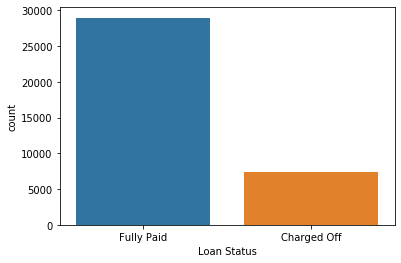

In [8]:
sns.countplot(x='Loan Status',data =datadf_con)

#### Categorical Variables Transformation

In [9]:
datadf_con['Loan Status'] = [0 if x == 'Fully Paid' else 1 for x in datadf_con['Loan Status']]


C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
datadf_con['Term'] = [0 if x == 'Short Term' else 1 for x in datadf_con['Term']]

C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
datadf_con['Years in current job']=datadf_con['Years in current job'].str.extract(r"(\d+)")
datadf_con['Years in current job'] = datadf_con['Years in current job'].astype(float)

C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
datadf_con['Purpose'].replace('other','Other',inplace = True)

C:\Users\saipr\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
datadf_f = pd.get_dummies(datadf_con)
datadf_f

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.0,0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,0,730.0,1184194.0,1.0,10855.08,19.6,10.0,13.0,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,0,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,...,0,0,0,0,0,0,0,0,0,0
10,0,99999999.0,0,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,...,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,0,740.0,776188.0,1.0,11578.22,8.5,25.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0,99999999.0,0,742.0,1190046.0,1.0,11969.81,20.1,16.0,9.0,...,0,0,1,0,0,0,0,0,0,0
99993,0,44484.0,0,717.0,1152426.0,10.0,6280.64,21.0,12.0,6.0,...,0,0,0,0,0,0,0,1,0,0
99994,0,210584.0,0,719.0,783389.0,1.0,3727.61,17.4,18.0,6.0,...,0,0,1,0,0,0,0,0,0,0
99996,0,99999999.0,0,732.0,1289416.0,1.0,13109.05,9.4,21.0,22.0,...,0,0,0,0,0,0,0,0,0,0


### X and Y datasets

In [14]:
datadf_f_x = datadf_f.drop(columns=['Loan Status'])

In [15]:
scaler = StandardScaler()
datadf_sc = scaler.fit_transform(datadf_f)
datadf_sc = pd.DataFrame(datadf_sc, columns=datadf_f.columns)
datadf_sc = datadf_sc.drop(columns=['Loan Status'])

In [16]:
y = datadf_f['Loan Status']
x = datadf_sc

In [17]:
x

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,2.530987,-0.639329,-0.218802,0.820013,0.503963,0.820715,-0.625862,-0.266987,1.304039,1.540895,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
1,-0.397980,-0.639329,-0.226451,-0.299615,-1.500670,-0.695342,0.080393,-1.133921,0.302347,1.540895,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
2,-0.388261,-0.639329,-0.262606,1.169696,-1.214294,-0.050325,0.531194,-0.084474,-1.500697,-0.352181,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
3,2.530987,-0.639329,-0.227841,-0.801420,-0.927918,-0.613035,-0.460568,1.877536,0.903362,-0.352181,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
4,2.530987,-0.639329,-0.219498,-0.735633,-1.500670,-0.635583,-1.587571,-0.449499,-1.100021,-0.352181,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,2.530987,-0.639329,-0.218107,-0.293362,-1.500670,-0.603222,0.155526,-0.860152,-0.499006,-0.352181,...,-0.266127,-0.111088,3.085087,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
36419,-0.403063,-0.639329,-0.235490,-0.333565,1.076716,-1.073372,0.290767,-1.042665,-1.100021,-0.352181,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,18.086877,-0.03357,-0.03274
36420,-0.398187,-0.639329,-0.234099,-0.727938,-1.500670,-1.284352,-0.250195,-0.768896,-1.100021,-0.352181,...,-0.266127,-0.111088,3.085087,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274
36421,2.530987,-0.639329,-0.225060,-0.187169,-1.500670,-0.509076,-1.452331,-0.632012,2.105392,-0.352181,...,-0.266127,-0.111088,-0.324140,-0.077776,-0.056524,-0.038889,-0.01048,-0.055289,-0.03357,-0.03274


### Train test Split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [19]:
y_train =pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)


#### Under Sampling the data to have a better model

In [20]:
un_samp_train = x_train

In [21]:
un_samp_train['Loan Status'] = [x for x in y_train['Loan Status']]

In [22]:
fp =un_samp_train[un_samp_train['Loan Status']== 0].sample(7000,axis=0,random_state = 33)

In [23]:
co =un_samp_train[un_samp_train['Loan Status']== 1]

In [24]:
s_train = pd.concat([fp,co],axis=0)

In [25]:
s_train['Loan Status'].value_counts()

0    7000
1    5194
Name: Loan Status, dtype: int64

## Final Train Sets for X and Y

In [26]:
y_s_train = s_train['Loan Status']


In [27]:
x_s_train = s_train.loc[:, s_train.columns != 'Loan Status']


# Copying the train and test

In [28]:
mlp_x_train = x_s_train.copy()
mlp_y_train = y_s_train.copy()
mlp_x_test = x_test.copy()
mlp_y_test = y_test.copy()

In [29]:
y_s_train.value_counts()


0    7000
1    5194
Name: Loan Status, dtype: int64

In [30]:
mlp_y_test.value_counts()

0    8670
1    2257
Name: Loan Status, dtype: int64

# Experimenting with both Neurons and Layers

In [257]:

#### Combination of Neurons and Layers
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
neurons_list = [33,28,23]
layers_combo = [3]
acc_list = []
acc_df = pd.DataFrame()
for layer_no in layers_combo:
    print("The Number of layers:",layer_no)
    neurons_combo = [p for p in itertools.product(neurons_list, repeat=layer_no)]
    for neurons in neurons_combo:
        print("The tuple of Neurons:",neurons)
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(neurons[0], input_dim=33, activation='sigmoid'))
            else:
                model.add(Dense(neurons[layer-1],activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=optimizer_value, loss='binary_crossentropy')
        model.fit(mlp_x_train, mlp_y_train, epochs=25,batch_size=200)
        pred = model.predict_classes(mlp_x_test)
        acc = f1_score(mlp_y_test,pred)
        print (acc)
        acc_values  =  [acc,layer_no,neurons]
        acc_values = pd.DataFrame(acc_values).T
        acc_df = pd.concat([acc_df,acc_values])

acc_df.columns = ['F1Score','LayerNumber','Neurons']
acc_df.sort_values(by='F1Score', ascending = False)

The Number of layers: 3
The tuple of Neurons: (33, 33, 33)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [31]:
acc_df= acc_df.sort_values(by='F1Score', ascending = False)
acc_df_head = acc_df.head(10)
acc_df_head

NameError: name 'acc_df' is not defined

Text(0.5, 1.0, 'F1 Score vs Neurons vs Layers')

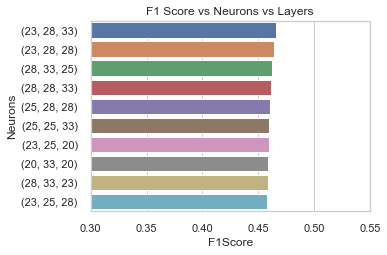

In [253]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
plt.figure(figsize=(5, 3.5))
g =sns.barplot(data=acc_df_head ,x='F1Score', y='Neurons',orient ="h")
g.set(xlim=(0.3, 0.55))
sns.set_style("whitegrid")
plt.title("F1 Score vs Neurons vs Layers")
# plt.svm_ax_lin(figsize=(20, 20))
# plt.show()


# Experimenting with Epochs

In [42]:
#### Epoch iterations_ Final
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)
mlp_x_train = pd.DataFrame(mlp_x_train)
mlp_y_train = pd.DataFrame(mlp_y_train)
mlp_df_epoch = []
mlp_df_epoch = pd.DataFrame()
for it in [10,25,50,100,400]: 
    mlp_score_train = []
    mlp_score_val = []
    for train, test in kfold.split(mlp_x_train, mlp_y_train):
        train = train.tolist()
        test = test.tolist()
        mlp_x_train_1 = mlp_x_train.iloc[train,:]
        mlp_y_train_1 = mlp_y_train.iloc[train,:]
        mlp_x_test_1 = mlp_x_train.iloc[test,:]
        mlp_y_test_1 = mlp_y_train.iloc[test,:]
#         print(train)
      # create model
        model = Sequential()
        model.add(Dense(33, input_dim=33, activation='sigmoid'))
        model.add(Dense(28, activation='sigmoid'))
        model.add(Dense(28, activation='sigmoid'))
        model.add(Dense(1,activation = 'sigmoid'))
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer=optimizer_value, metrics=['accuracy'])
        # Fit the model
        model.fit(mlp_x_train_1, mlp_y_train_1, epochs=it,batch_size =200)
        # evaluate the model
#         scores_train = model.evaluate(mlp_x_train_1, mlp_y_train_1, verbose=0)
#         scores_val = model.evaluate(mlp_x_test_1, mlp_y_test_1, verbose=0)
        pred_train = model.predict_classes(mlp_x_train_1)
        scores_train = f1_score(mlp_y_train_1,pred_train)
        pred_val = model.predict_classes(mlp_x_test_1)
        scores_val = f1_score(mlp_y_test_1,pred_val)
        mlp_score_train.append(scores_train)
        mlp_score_val.append(scores_val)
    mean_score_train = np.mean(mlp_score_train)
    mean_score_val = np.mean(mlp_score_val)
    values_mlp  =  [it, mean_score_train, mean_score_val]
    values_mlp = pd.DataFrame(values_mlp).T
    mlp_df_epoch = pd.concat([mlp_df_epoch,values_mlp])        
mlp_df_epoch.columns = ['Iterations','TrainF1','ValidationF1']    

Epoch 1/10
9755/9755 [==============================] - 0s 20us/step - loss: 0.6371 - accuracy: 0.6286
Epoch 2/10
9755/9755 [==============================] - 0s 8us/step - loss: 0.5439 - accuracy: 0.6889
Epoch 3/10
9755/9755 [==============================] - 0s 8us/step - loss: 0.5330 - accuracy: 0.6923
Epoch 4/10
9755/9755 [==============================] - 0s 8us/step - loss: 0.5275 - accuracy: 0.6975
Epoch 5/10
9755/9755 [==============================] - 0s 8us/step - loss: 0.5313 - accuracy: 0.6923
Epoch 6/10
9755/9755 [==============================] - 0s 9us/step - loss: 0.5229 - accuracy: 0.6989
Epoch 7/10
9755/9755 [==============================] - 0s 9us/step - loss: 0.5196 - accuracy: 0.6994
Epoch 8/10
9755/9755 [==============================] - 0s 10us/step - loss: 0.5178 - accuracy: 0.7025
Epoch 9/10
9755/9755 [==============================] - 0s 9us/step - loss: 0.5206 - accuracy: 0.6945
Epoch 10/10
9755/9755 [==============================] - 0s 9us/step - loss: 0.5

9755/9755 [==============================] - 0s 8us/step - loss: 0.5149 - accuracy: 0.7037
Epoch 6/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.5134 - accuracy: 0.7062
Epoch 7/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.5106 - accuracy: 0.7107
Epoch 8/25
9755/9755 [==============================] - 0s 7us/step - loss: 0.5090 - accuracy: 0.7101
Epoch 9/25
9755/9755 [==============================] - 0s 7us/step - loss: 0.5077 - accuracy: 0.7104
Epoch 10/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.5024 - accuracy: 0.7166
Epoch 11/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.5031 - accuracy: 0.7109
Epoch 12/25
9755/9755 [==============================] - 0s 9us/step - loss: 0.4999 - accuracy: 0.7158
Epoch 13/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.4994 - accuracy: 0.7146
Epoch 14/25
9755/9755 [==============================] - 0s 8us/step - loss: 0.4970 - acc

Epoch 9/25
9756/9756 [==============================] - 0s 22us/step - loss: 0.5070 - accuracy: 0.7109
Epoch 10/25
9756/9756 [==============================] - 0s 22us/step - loss: 0.5070 - accuracy: 0.7100
Epoch 11/25
9756/9756 [==============================] - 0s 19us/step - loss: 0.5044 - accuracy: 0.7118
Epoch 12/25
9756/9756 [==============================] - 0s 16us/step - loss: 0.5027 - accuracy: 0.7102
Epoch 13/25
9756/9756 [==============================] - 0s 18us/step - loss: 0.5052 - accuracy: 0.7078
Epoch 14/25
9756/9756 [==============================] - 0s 18us/step - loss: 0.4971 - accuracy: 0.7173
Epoch 15/25
9756/9756 [==============================] - 0s 16us/step - loss: 0.4961 - accuracy: 0.7183
Epoch 16/25
9756/9756 [==============================] - 0s 14us/step - loss: 0.4930 - accuracy: 0.7220
Epoch 17/25
9756/9756 [==============================] - 0s 14us/step - loss: 0.4915 - accuracy: 0.7221
Epoch 18/25
9756/9756 [==============================] - 0s 16us/

9755/9755 [==============================] - 0s 8us/step - loss: 0.5001 - accuracy: 0.7189
Epoch 14/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.5005 - accuracy: 0.7208
Epoch 15/50
9755/9755 [==============================] - 0s 7us/step - loss: 0.4990 - accuracy: 0.7192
Epoch 16/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.5015 - accuracy: 0.7157
Epoch 17/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.4988 - accuracy: 0.7214
Epoch 18/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.4944 - accuracy: 0.7225
Epoch 19/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.4924 - accuracy: 0.7238
Epoch 20/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4910 - accuracy: 0.7272
Epoch 21/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4892 - accuracy: 0.7249
Epoch 22/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4878 -

9755/9755 [==============================] - 0s 8us/step - loss: 0.4653 - accuracy: 0.7392
Epoch 43/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.4651 - accuracy: 0.7400
Epoch 44/50
9755/9755 [==============================] - 0s 7us/step - loss: 0.4646 - accuracy: 0.7383
Epoch 45/50
9755/9755 [==============================] - 0s 15us/step - loss: 0.4610 - accuracy: 0.7446
Epoch 46/50
9755/9755 [==============================] - 1s 54us/step - loss: 0.4611 - accuracy: 0.7377
Epoch 47/50
9755/9755 [==============================] - 0s 51us/step - loss: 0.4607 - accuracy: 0.7420
Epoch 48/50
9755/9755 [==============================] - 1s 54us/step - loss: 0.4590 - accuracy: 0.7411
Epoch 49/50
9755/9755 [==============================] - 1s 58us/step - loss: 0.4558 - accuracy: 0.7463 0s - loss: 0.4507 - ac
Epoch 50/50
9755/9755 [==============================] - 1s 55us/step - loss: 0.4561 - accuracy: 0.7479
Epoch 1/50
9755/9755 [==============================] - 

9756/9756 [==============================] - 0s 17us/step - loss: 0.4876 - accuracy: 0.7263
Epoch 21/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4849 - accuracy: 0.7288
Epoch 22/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4856 - accuracy: 0.7304
Epoch 23/50
9756/9756 [==============================] - 0s 15us/step - loss: 0.4821 - accuracy: 0.7307
Epoch 24/50
9756/9756 [==============================] - 0s 15us/step - loss: 0.4800 - accuracy: 0.7351
Epoch 25/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4793 - accuracy: 0.7361
Epoch 26/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4768 - accuracy: 0.7369
Epoch 27/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4750 - accuracy: 0.7375
Epoch 28/50
9756/9756 [==============================] - 0s 16us/step - loss: 0.4758 - accuracy: 0.7382
Epoch 29/50
9756/9756 [==============================] - 0s 17us/step - loss

9755/9755 [==============================] - 0s 8us/step - loss: 0.4497 - accuracy: 0.7384
Epoch 50/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4487 - accuracy: 0.7394
Epoch 51/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4466 - accuracy: 0.7418
Epoch 52/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4457 - accuracy: 0.7413
Epoch 53/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4458 - accuracy: 0.7439
Epoch 54/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4434 - accuracy: 0.7428
Epoch 55/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4420 - accuracy: 0.7448
Epoch 56/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4397 - accuracy: 0.7496
Epoch 57/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4399 - accuracy: 0.7485
Epoch 58/100
9755/9755 [==============================] - 0s 8us/step - loss:

Epoch 28/100
9755/9755 [==============================] - 0s 7us/step - loss: 0.4830 - accuracy: 0.7254
Epoch 29/100
9755/9755 [==============================] - 0s 7us/step - loss: 0.4820 - accuracy: 0.7266
Epoch 30/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4796 - accuracy: 0.7307
Epoch 31/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4777 - accuracy: 0.7298
Epoch 32/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4777 - accuracy: 0.7306
Epoch 33/100
9755/9755 [==============================] - ETA: 0s - loss: 0.4736 - accuracy: 0.73 - 0s 8us/step - loss: 0.4763 - accuracy: 0.7350
Epoch 34/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4737 - accuracy: 0.7345
Epoch 35/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4749 - accuracy: 0.7322
Epoch 36/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4720 - accuracy: 0.7334
Epoch 37/100
9755/9755

9755/9755 [==============================] - 0s 8us/step - loss: 0.5163 - accuracy: 0.7056
Epoch 7/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5170 - accuracy: 0.7030
Epoch 8/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5159 - accuracy: 0.7009
Epoch 9/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5127 - accuracy: 0.7053
Epoch 10/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5128 - accuracy: 0.7060
Epoch 11/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5102 - accuracy: 0.7063
Epoch 12/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5081 - accuracy: 0.7091
Epoch 13/100
9755/9755 [==============================] - 0s 7us/step - loss: 0.5069 - accuracy: 0.7089
Epoch 14/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.5048 - accuracy: 0.7144
Epoch 15/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.

9755/9755 [==============================] - 0s 8us/step - loss: 0.4179 - accuracy: 0.7634
Epoch 85/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4139 - accuracy: 0.7619
Epoch 86/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4145 - accuracy: 0.7610
Epoch 87/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4114 - accuracy: 0.7670
Epoch 88/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4108 - accuracy: 0.7613
Epoch 89/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4095 - accuracy: 0.7671
Epoch 90/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4087 - accuracy: 0.7679
Epoch 91/100
9755/9755 [==============================] - 0s 9us/step - loss: 0.4076 - accuracy: 0.7635
Epoch 92/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4077 - accuracy: 0.7652
Epoch 93/100
9755/9755 [==============================] - 0s 8us/step - loss:

Epoch 63/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4345 - accuracy: 0.7515
Epoch 64/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4320 - accuracy: 0.7532
Epoch 65/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4304 - accuracy: 0.7540
Epoch 66/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4312 - accuracy: 0.7586
Epoch 67/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4283 - accuracy: 0.7576
Epoch 68/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4277 - accuracy: 0.7582
Epoch 69/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4257 - accuracy: 0.7566
Epoch 70/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4257 - accuracy: 0.7565
Epoch 71/100
9755/9755 [==============================] - 0s 8us/step - loss: 0.4253 - accuracy: 0.7618
Epoch 72/100
9755/9755 [==============================] - 0s 8us

9756/9756 [==============================] - 0s 15us/step - loss: 0.4585 - accuracy: 0.7459
Epoch 42/100
9756/9756 [==============================] - 0s 17us/step - loss: 0.4570 - accuracy: 0.7460
Epoch 43/100
9756/9756 [==============================] - 0s 17us/step - loss: 0.4565 - accuracy: 0.7526
Epoch 44/100
9756/9756 [==============================] - 0s 16us/step - loss: 0.4537 - accuracy: 0.7490
Epoch 45/100
9756/9756 [==============================] - 0s 16us/step - loss: 0.4511 - accuracy: 0.7536
Epoch 46/100
9756/9756 [==============================] - 0s 15us/step - loss: 0.4500 - accuracy: 0.7505
Epoch 47/100
9756/9756 [==============================] - 0s 16us/step - loss: 0.4484 - accuracy: 0.7544
Epoch 48/100
9756/9756 [==============================] - 0s 15us/step - loss: 0.4468 - accuracy: 0.7528
Epoch 49/100
9756/9756 [==============================] - 0s 15us/step - loss: 0.4439 - accuracy: 0.7550
Epoch 50/100
9756/9756 [==============================] - 0s 16us/st

9755/9755 [==============================] - 0s 15us/step - loss: 0.4852 - accuracy: 0.7195
Epoch 20/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4841 - accuracy: 0.7228
Epoch 21/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.4822 - accuracy: 0.7246
Epoch 22/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4803 - accuracy: 0.7259
Epoch 23/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4800 - accuracy: 0.7252
Epoch 24/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.4761 - accuracy: 0.7285
Epoch 25/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.4742 - accuracy: 0.7293
Epoch 26/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4723 - accuracy: 0.7281
Epoch 27/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4707 - accuracy: 0.7289
Epoch 28/400
9755/9755 [==============================] - 0s 14us/st

9755/9755 [==============================] - 0s 8us/step - loss: 0.3983 - accuracy: 0.7669
Epoch 98/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3967 - accuracy: 0.7727
Epoch 99/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3955 - accuracy: 0.7731
Epoch 100/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3933 - accuracy: 0.7712
Epoch 101/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3924 - accuracy: 0.7730
Epoch 102/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3905 - accuracy: 0.7742
Epoch 103/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3917 - accuracy: 0.7749
Epoch 104/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3886 - accuracy: 0.7766
Epoch 105/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3906 - accuracy: 0.7763
Epoch 106/400
9755/9755 [==============================] - 0s 8us/step 

9755/9755 [==============================] - 0s 8us/step - loss: 0.3540 - accuracy: 0.7945
Epoch 175/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3505 - accuracy: 0.7932
Epoch 176/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3447 - accuracy: 0.7992
Epoch 177/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3437 - accuracy: 0.7989
Epoch 178/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3435 - accuracy: 0.8007
Epoch 179/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3442 - accuracy: 0.8019
Epoch 180/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3470 - accuracy: 0.7999
Epoch 181/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3454 - accuracy: 0.7973
Epoch 182/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3460 - accuracy: 0.7973
Epoch 183/400
9755/9755 [==============================] - 0s 8us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.3238 - accuracy: 0.8119
Epoch 253/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3197 - accuracy: 0.8141
Epoch 254/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3193 - accuracy: 0.8137
Epoch 255/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3171 - accuracy: 0.8162
Epoch 256/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3171 - accuracy: 0.8124
Epoch 257/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3184 - accuracy: 0.8136
Epoch 258/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3215 - accuracy: 0.8122
Epoch 259/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3175 - accuracy: 0.8150
Epoch 260/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3197 - accuracy: 0.8147
Epoch 261/400
9755/9755 [==============================] - 0s 8us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.2969 - accuracy: 0.8252
Epoch 331/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2985 - accuracy: 0.8276
Epoch 332/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3026 - accuracy: 0.8233
Epoch 333/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3039 - accuracy: 0.8246
Epoch 334/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3050 - accuracy: 0.8233
Epoch 335/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2973 - accuracy: 0.8289
Epoch 336/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2971 - accuracy: 0.8263
Epoch 337/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2960 - accuracy: 0.8257
Epoch 338/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2973 - accuracy: 0.8275
Epoch 339/400
9755/9755 [==============================] - 0s 8us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.5093 - accuracy: 0.7136
Epoch 8/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.5080 - accuracy: 0.7131
Epoch 9/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.5069 - accuracy: 0.7140
Epoch 10/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.5039 - accuracy: 0.7147
Epoch 11/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.5015 - accuracy: 0.7172
Epoch 12/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.5009 - accuracy: 0.7178
Epoch 13/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4992 - accuracy: 0.7179
Epoch 14/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.4964 - accuracy: 0.7243
Epoch 15/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4960 - accuracy: 0.7219
Epoch 16/400
9755/9755 [==============================] - 0s 8us/step - loss: 0

9755/9755 [==============================] - 0s 8us/step - loss: 0.4010 - accuracy: 0.7793
Epoch 86/400
9755/9755 [==============================] - 0s 9us/step - loss: 0.4006 - accuracy: 0.7814
Epoch 87/400
9755/9755 [==============================] - 0s 10us/step - loss: 0.4016 - accuracy: 0.7772
Epoch 88/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4027 - accuracy: 0.7788
Epoch 89/400
9755/9755 [==============================] - 0s 9us/step - loss: 0.4029 - accuracy: 0.7783
Epoch 90/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3965 - accuracy: 0.7808
Epoch 91/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3957 - accuracy: 0.7803
Epoch 92/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3963 - accuracy: 0.7798
Epoch 93/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3950 - accuracy: 0.7807
Epoch 94/400
9755/9755 [==============================] - 0s 9us/step - loss

9755/9755 [==============================] - 0s 15us/step - loss: 0.3510 - accuracy: 0.8067
Epoch 163/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3448 - accuracy: 0.8110
Epoch 164/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3450 - accuracy: 0.8105
Epoch 165/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3462 - accuracy: 0.8077
Epoch 166/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3439 - accuracy: 0.8109
Epoch 167/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3408 - accuracy: 0.8136
Epoch 168/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.3405 - accuracy: 0.8111
Epoch 169/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.3447 - accuracy: 0.8080
Epoch 170/400
9755/9755 [==============================] - 0s 16us/step - loss: 0.3458 - accuracy: 0.8105
Epoch 171/400
9755/9755 [==============================] - 0

9755/9755 [==============================] - 0s 14us/step - loss: 0.3317 - accuracy: 0.8169
Epoch 240/400
9755/9755 [==============================] - 0s 13us/step - loss: 0.3292 - accuracy: 0.8201
Epoch 241/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3213 - accuracy: 0.8210
Epoch 242/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3194 - accuracy: 0.8229
Epoch 243/400
9755/9755 [==============================] - 0s 13us/step - loss: 0.3217 - accuracy: 0.8219
Epoch 244/400
9755/9755 [==============================] - 0s 13us/step - loss: 0.3233 - accuracy: 0.8195
Epoch 245/400
9755/9755 [==============================] - 0s 13us/step - loss: 0.3243 - accuracy: 0.8216
Epoch 246/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3209 - accuracy: 0.8225
Epoch 247/400
9755/9755 [==============================] - 0s 13us/step - loss: 0.3208 - accuracy: 0.8208
Epoch 248/400
9755/9755 [==============================] - 0

9755/9755 [==============================] - 0s 8us/step - loss: 0.3060 - accuracy: 0.8317
Epoch 318/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3044 - accuracy: 0.8316
Epoch 319/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3087 - accuracy: 0.8304
Epoch 320/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3017 - accuracy: 0.8337
Epoch 321/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2983 - accuracy: 0.8364
Epoch 322/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2964 - accuracy: 0.8350
Epoch 323/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3000 - accuracy: 0.8357
Epoch 324/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3007 - accuracy: 0.8335
Epoch 325/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3000 - accuracy: 0.8348
Epoch 326/400
9755/9755 [==============================] - 0s 8us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.2905 - accuracy: 0.8437
Epoch 395/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2862 - accuracy: 0.8446
Epoch 396/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2844 - accuracy: 0.8452
Epoch 397/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2899 - accuracy: 0.8420
Epoch 398/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2870 - accuracy: 0.8425
Epoch 399/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2905 - accuracy: 0.8454
Epoch 400/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2910 - accuracy: 0.8432
Epoch 1/400
9755/9755 [==============================] - 0s 19us/step - loss: 0.6316 - accuracy: 0.6440
Epoch 2/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.5375 - accuracy: 0.6845
Epoch 3/400
9755/9755 [==============================] - 0s 8us/step - l

9755/9755 [==============================] - 0s 7us/step - loss: 0.4289 - accuracy: 0.7672
Epoch 73/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4297 - accuracy: 0.7650
Epoch 74/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4264 - accuracy: 0.7661
Epoch 75/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.4277 - accuracy: 0.7630
Epoch 76/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4283 - accuracy: 0.7665
Epoch 77/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.4245 - accuracy: 0.7702
Epoch 78/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.4239 - accuracy: 0.7718
Epoch 79/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.4245 - accuracy: 0.7681
Epoch 80/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.4230 - accuracy: 0.7666
Epoch 81/400
9755/9755 [==============================] - 0s 7us/step - loss:

9755/9755 [==============================] - 0s 8us/step - loss: 0.3696 - accuracy: 0.8032
Epoch 151/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3733 - accuracy: 0.8026
Epoch 152/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3731 - accuracy: 0.8017
Epoch 153/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3705 - accuracy: 0.8055
Epoch 154/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3682 - accuracy: 0.8058
Epoch 155/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3659 - accuracy: 0.8050
Epoch 156/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3664 - accuracy: 0.8079
Epoch 157/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3682 - accuracy: 0.8044
Epoch 158/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3683 - accuracy: 0.8071
Epoch 159/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.3377 - accuracy: 0.8237
Epoch 229/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3397 - accuracy: 0.8200
Epoch 230/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3454 - accuracy: 0.8203
Epoch 231/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3438 - accuracy: 0.8233
Epoch 232/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3400 - accuracy: 0.8216
Epoch 233/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3379 - accuracy: 0.8220
Epoch 234/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3354 - accuracy: 0.8231
Epoch 235/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3403 - accuracy: 0.8192
Epoch 236/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3362 - accuracy: 0.8238
Epoch 237/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.3208 - accuracy: 0.8329
Epoch 307/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3188 - accuracy: 0.8309
Epoch 308/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3206 - accuracy: 0.8318
Epoch 309/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3200 - accuracy: 0.8320
Epoch 310/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3270 - accuracy: 0.8278
Epoch 311/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3273 - accuracy: 0.8303
Epoch 312/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3255 - accuracy: 0.8291
Epoch 313/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3149 - accuracy: 0.8336
Epoch 314/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3110 - accuracy: 0.8375
Epoch 315/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 49us/step - loss: 0.2950 - accuracy: 0.8459
Epoch 385/400
9755/9755 [==============================] - 0s 49us/step - loss: 0.3009 - accuracy: 0.8415
Epoch 386/400
9755/9755 [==============================] - 0s 48us/step - loss: 0.3100 - accuracy: 0.8391
Epoch 387/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3037 - accuracy: 0.8419
Epoch 388/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.2980 - accuracy: 0.8452
Epoch 389/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.3001 - accuracy: 0.8440
Epoch 390/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3034 - accuracy: 0.8403
Epoch 391/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3004 - accuracy: 0.8423
Epoch 392/400
9755/9755 [==============================] - 0s 14us/step - loss: 0.3019 - accuracy: 0.8418
Epoch 393/400
9755/9755 [==============================] - 0

9755/9755 [==============================] - 0s 16us/step - loss: 0.4345 - accuracy: 0.7526
Epoch 62/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4303 - accuracy: 0.7560
Epoch 63/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4272 - accuracy: 0.7592
Epoch 64/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4272 - accuracy: 0.7584
Epoch 65/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4260 - accuracy: 0.7593
Epoch 66/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4251 - accuracy: 0.7603
Epoch 67/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4279 - accuracy: 0.7591
Epoch 68/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4245 - accuracy: 0.7595
Epoch 69/400
9755/9755 [==============================] - 0s 15us/step - loss: 0.4225 - accuracy: 0.7589
Epoch 70/400
9755/9755 [==============================] - 0s 15us/st

9755/9755 [==============================] - 0s 7us/step - loss: 0.3713 - accuracy: 0.7827
Epoch 140/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3712 - accuracy: 0.7876
Epoch 141/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3729 - accuracy: 0.7856
Epoch 142/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3707 - accuracy: 0.7891
Epoch 143/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3718 - accuracy: 0.7863
Epoch 144/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3698 - accuracy: 0.7865
Epoch 145/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3644 - accuracy: 0.7902
Epoch 146/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3632 - accuracy: 0.7899
Epoch 147/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3643 - accuracy: 0.7895
Epoch 148/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 7us/step - loss: 0.3325 - accuracy: 0.8086
Epoch 218/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3302 - accuracy: 0.8108
Epoch 219/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3302 - accuracy: 0.8138
Epoch 220/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3294 - accuracy: 0.8134
Epoch 221/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3391 - accuracy: 0.8086
Epoch 222/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3422 - accuracy: 0.8069
Epoch 223/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3410 - accuracy: 0.8071
Epoch 224/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3327 - accuracy: 0.8123
Epoch 225/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3267 - accuracy: 0.8135
Epoch 226/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 7us/step - loss: 0.2997 - accuracy: 0.8304
Epoch 296/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2977 - accuracy: 0.8352
Epoch 297/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3025 - accuracy: 0.8305
Epoch 298/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3008 - accuracy: 0.8313
Epoch 299/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3093 - accuracy: 0.8276
Epoch 300/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3142 - accuracy: 0.8272
Epoch 301/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.3031 - accuracy: 0.8310
Epoch 302/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2990 - accuracy: 0.8322
Epoch 303/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2981 - accuracy: 0.8341
Epoch 304/400
9755/9755 [==============================] - 0s 7us/ste

9755/9755 [==============================] - 0s 8us/step - loss: 0.2789 - accuracy: 0.8430
Epoch 374/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2843 - accuracy: 0.8404
Epoch 375/400
9755/9755 [==============================] - 0s 8us/step - loss: 0.2823 - accuracy: 0.8402
Epoch 376/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2910 - accuracy: 0.8373
Epoch 377/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2964 - accuracy: 0.8376
Epoch 378/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.3005 - accuracy: 0.8332
Epoch 379/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2912 - accuracy: 0.8393
Epoch 380/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2810 - accuracy: 0.8418
Epoch 381/400
9755/9755 [==============================] - 0s 7us/step - loss: 0.2785 - accuracy: 0.8413
Epoch 382/400
9755/9755 [==============================] - 0s 7us/ste

9756/9756 [==============================] - 0s 7us/step - loss: 0.4445 - accuracy: 0.7497
Epoch 52/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4424 - accuracy: 0.7493
Epoch 53/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4417 - accuracy: 0.7519
Epoch 54/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.4405 - accuracy: 0.7531
Epoch 55/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4395 - accuracy: 0.7531
Epoch 56/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4410 - accuracy: 0.7449
Epoch 57/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4376 - accuracy: 0.7537
Epoch 58/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4374 - accuracy: 0.7550
Epoch 59/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.4388 - accuracy: 0.7529
Epoch 60/400
9756/9756 [==============================] - 0s 7us/step - loss:

9756/9756 [==============================] - 0s 7us/step - loss: 0.3808 - accuracy: 0.7814
Epoch 130/400
9756/9756 [==============================] - 0s 9us/step - loss: 0.3802 - accuracy: 0.7843
Epoch 131/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.3799 - accuracy: 0.7842
Epoch 132/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3785 - accuracy: 0.7823
Epoch 133/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3809 - accuracy: 0.7818
Epoch 134/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3777 - accuracy: 0.7836
Epoch 135/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3762 - accuracy: 0.7856
Epoch 136/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.3757 - accuracy: 0.7862
Epoch 137/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3784 - accuracy: 0.7842
Epoch 138/400
9756/9756 [==============================] - 0s 7us/ste

9756/9756 [==============================] - 0s 14us/step - loss: 0.3490 - accuracy: 0.8004
Epoch 207/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3475 - accuracy: 0.8018
Epoch 208/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3494 - accuracy: 0.7974
Epoch 209/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3466 - accuracy: 0.7999
Epoch 210/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3464 - accuracy: 0.8018
Epoch 211/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3490 - accuracy: 0.7966
Epoch 212/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3538 - accuracy: 0.7993
Epoch 213/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3509 - accuracy: 0.7976
Epoch 214/400
9756/9756 [==============================] - 0s 14us/step - loss: 0.3580 - accuracy: 0.7999
Epoch 215/400
9756/9756 [==============================] - 0

9756/9756 [==============================] - 0s 13us/step - loss: 0.3286 - accuracy: 0.8139
Epoch 284/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3287 - accuracy: 0.8110
Epoch 285/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3301 - accuracy: 0.8139
Epoch 286/400
9756/9756 [==============================] - 0s 12us/step - loss: 0.3320 - accuracy: 0.8145
Epoch 287/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3316 - accuracy: 0.8145
Epoch 288/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3292 - accuracy: 0.8136
Epoch 289/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3278 - accuracy: 0.8127
Epoch 290/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3291 - accuracy: 0.8173
Epoch 291/400
9756/9756 [==============================] - 0s 13us/step - loss: 0.3348 - accuracy: 0.8105
Epoch 292/400
9756/9756 [==============================] - 0

Epoch 361/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.3317 - accuracy: 0.8148
Epoch 362/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3268 - accuracy: 0.8181
Epoch 363/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3232 - accuracy: 0.8181
Epoch 364/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3293 - accuracy: 0.8187
Epoch 365/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3208 - accuracy: 0.8214
Epoch 366/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.3151 - accuracy: 0.8242
Epoch 367/400
9756/9756 [==============================] - 0s 8us/step - loss: 0.3118 - accuracy: 0.8238
Epoch 368/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3109 - accuracy: 0.8251
Epoch 369/400
9756/9756 [==============================] - 0s 7us/step - loss: 0.3113 - accuracy: 0.8231
Epoch 370/400
9756/9756 [==============================

In [44]:
mlp_df_epoch.columns = ['Iterations','TrainF1','ValidationF1']   

In [45]:
mlp_df_epoch

,Iterations,TrainF1,ValidationF1
0,10.0,0.572967,0.547529
0,25.0,0.597014,0.544733
0,50.0,0.654031,0.564896
0,100.0,0.697277,0.562705
0,400.0,0.793007,0.563769


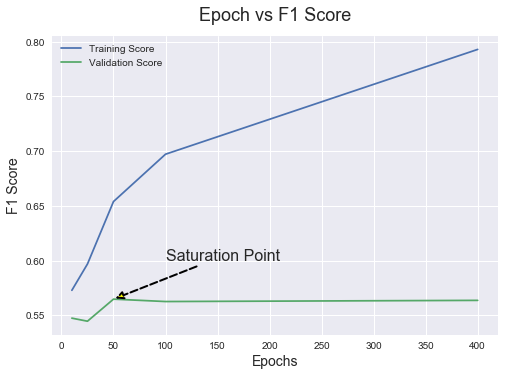

In [77]:
plt.style.use('seaborn')
plt.plot(mlp_df_epoch['Iterations'], mlp_df_epoch['TrainF1'], label = 'Training Score')
plt.plot(mlp_df_epoch['Iterations'], mlp_df_epoch['ValidationF1'], label = 'Validation Score')
plt.ylabel('F1 Score', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.annotate("Saturation Point",fontsize=16,xy=(50.0,0.564896),xytext=(100, 0.60), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="yellow",edgecolor="black",linestyle='--',linewidth=2))
plt.title('Epoch vs F1 Score', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
# Experimenting with Layers

In [52]:
#### No OF layers
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)
mlp_x_train = pd.DataFrame(mlp_x_train)
mlp_y_train = pd.DataFrame(mlp_y_train)
layers_combo = [2,3,4,5]

mlp_df_lay= []
mlp_df_lay = pd.DataFrame()
for layer_no in layers_combo:
    mlp_score_lay_train = []
    mlp_score_lay_val = []
    for train, test in kfold.split(mlp_x_train, mlp_y_train):
        train = train.tolist()
        test = test.tolist()
        mlp_x_train_1 = mlp_x_train.iloc[train,:]
        mlp_y_train_1 = mlp_y_train.iloc[train,:]
        mlp_x_test_1 = mlp_x_train.iloc[test,:]
        mlp_y_test_1 = mlp_y_train.iloc[test,:]
#         print(train)
      # create model
        model = Sequential()
        for layer in range(1,layer_no+1):
            if (layer == 1):
                model.add(Dense(33, input_dim=33, activation='sigmoid'))
            if(layer ==2):
                model.add(Dense(28, activation='sigmoid'))
            if(layer ==3):
                model.add(Dense(28, activation='sigmoid'))
            if(layer ==4):
                model.add(Dense(28, activation='sigmoid'))
            else:
                model.add(Dense(23,activation='sigmoid'))
        model.add(Dense(1,activation = 'sigmoid'))
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer = optimizer_value, metrics=['accuracy'])
        # Fit the model
        model.fit(mlp_x_train_1, mlp_y_train_1, epochs=50,batch_size=200)
#         # evaluate the model
#         scores_lay_train = model.evaluate(mlp_x_train_1, mlp_y_train_1, verbose=0)
#         scores_lay_val = model.evaluate(mlp_x_test_1, mlp_y_test_1, verbose=0)
#         mlp_score_lay_train.append(scores_lay_train[1])
#         mlp_score_lay_val.append(scores_lay_val[1])
        pred_train = model.predict_classes(mlp_x_train_1)
        scores_lay_train = f1_score(mlp_y_train_1,pred_train)
        pred_val = model.predict_classes(mlp_x_test_1)
        scores_lay_val = f1_score(mlp_y_test_1,pred_val)
        mlp_score_lay_train.append(scores_lay_train)
        mlp_score_lay_val.append(scores_lay_val)
    mean_score_train = np.mean(mlp_score_lay_train)
    mean_score_val = np.mean(mlp_score_lay_val)
    values_mlp_lay  =  [layer_no, mean_score_train,mean_score_val]
    values_mlp_lay = pd.DataFrame(values_mlp_lay).T
    mlp_df_lay = pd.concat([mlp_df_lay,values_mlp_lay])     
mlp_df_lay.columns = ['Layers','TrainF1','ValidationF1'] 

Epoch 1/50
9755/9755 [==============================] - 0s 22us/step - loss: 0.6385 - accuracy: 0.6343
Epoch 2/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5522 - accuracy: 0.6934
Epoch 3/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5423 - accuracy: 0.6889
Epoch 4/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5292 - accuracy: 0.7014
Epoch 5/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5291 - accuracy: 0.6897
Epoch 6/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5228 - accuracy: 0.6965
Epoch 7/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5210 - accuracy: 0.6991
Epoch 8/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5184 - accuracy: 0.7032
Epoch 9/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5177 - accuracy: 0.7025
Epoch 10/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.51

9755/9755 [==============================] - 0s 9us/step - loss: 0.4728 - accuracy: 0.7351
Epoch 31/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4726 - accuracy: 0.7361
Epoch 32/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4710 - accuracy: 0.7372
Epoch 33/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4675 - accuracy: 0.7387
Epoch 34/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4666 - accuracy: 0.7405
Epoch 35/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4644 - accuracy: 0.7423
Epoch 36/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4699 - accuracy: 0.7399
Epoch 37/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4646 - accuracy: 0.7404
Epoch 38/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4628 - accuracy: 0.7379
Epoch 39/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.4626 

9755/9755 [==============================] - 0s 9us/step - loss: 0.5053 - accuracy: 0.7094
Epoch 10/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.5058 - accuracy: 0.7058
Epoch 11/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.5039 - accuracy: 0.7096
Epoch 12/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.5004 - accuracy: 0.7105
Epoch 13/50
9755/9755 [==============================] - 0s 8us/step - loss: 0.5014 - accuracy: 0.7114
Epoch 14/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4988 - accuracy: 0.7114
Epoch 15/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4980 - accuracy: 0.7158
Epoch 16/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4954 - accuracy: 0.7135
Epoch 17/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4940 - accuracy: 0.7173
Epoch 18/50
9755/9755 [==============================] - 0s 9us/step - loss: 0.4948 -

9756/9756 [==============================] - 0s 9us/step - loss: 0.4635 - accuracy: 0.7349
Epoch 39/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.4572 - accuracy: 0.7379
Epoch 40/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.4568 - accuracy: 0.7419
Epoch 41/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.4569 - accuracy: 0.7392
Epoch 42/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.4543 - accuracy: 0.7420
Epoch 43/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.4509 - accuracy: 0.7455
Epoch 44/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.4504 - accuracy: 0.7430
Epoch 45/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4525 - accuracy: 0.7406
Epoch 46/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4509 - accuracy: 0.7395
Epoch 47/50
9756/9756 [==============================] - 0s 9us/step - loss: 0.445

9755/9755 [==============================] - 0s 10us/step - loss: 0.5061 - accuracy: 0.7152
Epoch 18/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5061 - accuracy: 0.7170
Epoch 19/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5070 - accuracy: 0.7137
Epoch 20/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5055 - accuracy: 0.7152
Epoch 21/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5053 - accuracy: 0.7131
Epoch 22/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5021 - accuracy: 0.7168
Epoch 23/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5008 - accuracy: 0.7190
Epoch 24/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5005 - accuracy: 0.7183
Epoch 25/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.4995 - accuracy: 0.7194
Epoch 26/50
9755/9755 [==============================] - 0s 11us/step - loss

9755/9755 [==============================] - 0s 10us/step - loss: 0.4741 - accuracy: 0.7326
Epoch 46/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.4715 - accuracy: 0.7381
Epoch 47/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.4738 - accuracy: 0.7353
Epoch 48/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.4709 - accuracy: 0.7375
Epoch 49/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.4696 - accuracy: 0.7389
Epoch 50/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.4712 - accuracy: 0.7405
Epoch 1/50
9755/9755 [==============================] - 0s 29us/step - loss: 0.7030 - accuracy: 0.5591
Epoch 2/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6823 - accuracy: 0.5741
Epoch 3/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.6373 - accuracy: 0.6480
Epoch 4/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.

9756/9756 [==============================] - 0s 11us/step - loss: 0.4982 - accuracy: 0.7149
Epoch 25/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4977 - accuracy: 0.7139
Epoch 26/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.4928 - accuracy: 0.7218
Epoch 27/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4921 - accuracy: 0.7227
Epoch 28/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.4925 - accuracy: 0.7199
Epoch 29/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.4884 - accuracy: 0.7252
Epoch 30/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4897 - accuracy: 0.7262
Epoch 31/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4883 - accuracy: 0.7280
Epoch 32/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.4864 - accuracy: 0.7285
Epoch 33/50
9756/9756 [==============================] - 0s 11us/step - loss

Epoch 3/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.6833 - accuracy: 0.5741
Epoch 4/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.6833 - accuracy: 0.5741
Epoch 5/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.6844 - accuracy: 0.5741
Epoch 6/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.6404 - accuracy: 0.6434
Epoch 7/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.6002 - accuracy: 0.6840
Epoch 8/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5964 - accuracy: 0.6874
Epoch 9/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5955 - accuracy: 0.6881
Epoch 10/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5950 - accuracy: 0.6882
Epoch 11/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5960 - accuracy: 0.6882
Epoch 12/50
9755/9755 [==============================] - 0s 11us/step -

9755/9755 [==============================] - 0s 11us/step - loss: 0.5109 - accuracy: 0.7024
Epoch 32/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5109 - accuracy: 0.7026
Epoch 33/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5083 - accuracy: 0.7015
Epoch 34/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5084 - accuracy: 0.7031
Epoch 35/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.5082 - accuracy: 0.7062
Epoch 36/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5061 - accuracy: 0.7069
Epoch 37/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5070 - accuracy: 0.7034
Epoch 38/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5056 - accuracy: 0.7053
Epoch 39/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5034 - accuracy: 0.7045
Epoch 40/50
9755/9755 [==============================] - 0s 11us/step - loss

9756/9756 [==============================] - 0s 10us/step - loss: 0.6366 - accuracy: 0.6172
Epoch 11/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.6352 - accuracy: 0.6255
Epoch 12/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.6360 - accuracy: 0.6294
Epoch 13/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.6316 - accuracy: 0.6187
Epoch 14/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.6165 - accuracy: 0.6544
Epoch 15/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.5819 - accuracy: 0.6809
Epoch 16/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.5557 - accuracy: 0.6945
Epoch 17/50
9756/9756 [==============================] - 0s 11us/step - loss: 0.5422 - accuracy: 0.6844
Epoch 18/50
9756/9756 [==============================] - 0s 10us/step - loss: 0.5327 - accuracy: 0.6924
Epoch 19/50
9756/9756 [==============================] - 0s 10us/step - loss

9755/9755 [==============================] - 0s 12us/step - loss: 0.6197 - accuracy: 0.6845
Epoch 38/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.6074 - accuracy: 0.6902
Epoch 39/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.6051 - accuracy: 0.6865
Epoch 40/50
9755/9755 [==============================] - 0s 13us/step - loss: 0.6024 - accuracy: 0.6860
Epoch 41/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5990 - accuracy: 0.6840
Epoch 42/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5972 - accuracy: 0.6872
Epoch 43/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5935 - accuracy: 0.6869
Epoch 44/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5957 - accuracy: 0.6868
Epoch 45/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5959 - accuracy: 0.6870
Epoch 46/50
9755/9755 [==============================] - 0s 12us/step - loss

9755/9755 [==============================] - 0s 21us/step - loss: 0.6409 - accuracy: 0.6186
Epoch 16/50
9755/9755 [==============================] - 0s 21us/step - loss: 0.6405 - accuracy: 0.6073
Epoch 17/50
9755/9755 [==============================] - 0s 17us/step - loss: 0.6404 - accuracy: 0.6096
Epoch 18/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6389 - accuracy: 0.6264
Epoch 19/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.6393 - accuracy: 0.6301
Epoch 20/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6396 - accuracy: 0.6365
Epoch 21/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6394 - accuracy: 0.6358
Epoch 22/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6401 - accuracy: 0.6370
Epoch 23/50
9755/9755 [==============================] - 0s 10us/step - loss: 0.6428 - accuracy: 0.6340
Epoch 24/50
9755/9755 [==============================] - 0s 11us/step - loss

Epoch 44/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5900 - accuracy: 0.6866
Epoch 45/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5857 - accuracy: 0.6904
Epoch 46/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5857 - accuracy: 0.6911
Epoch 47/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5863 - accuracy: 0.6923
Epoch 48/50
9755/9755 [==============================] - 0s 12us/step - loss: 0.5823 - accuracy: 0.6910
Epoch 49/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5787 - accuracy: 0.6892
Epoch 50/50
9755/9755 [==============================] - 0s 11us/step - loss: 0.5720 - accuracy: 0.6961
Epoch 1/50
9756/9756 [==============================] - 0s 34us/step - loss: 0.6951 - accuracy: 0.5502
Epoch 2/50
9756/9756 [==============================] - 0s 12us/step - loss: 0.6826 - accuracy: 0.5740
Epoch 3/50
9756/9756 [==============================] - 0s 13us/st

In [53]:
mlp_df_lay

,Layers,TrainF1,ValidationF1
0,2.0,0.639858,0.565331
0,3.0,0.642794,0.570917
0,4.0,0.549658,0.514325
0,5.0,0.483766,0.464748


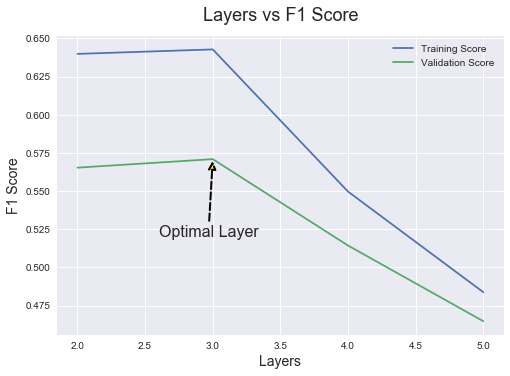

In [57]:
plt.style.use('seaborn')
plt.plot(mlp_df_lay['Layers'], mlp_df_lay['TrainF1'], label = 'Training Score')
plt.plot(mlp_df_lay['Layers'], mlp_df_lay['ValidationF1'], label = 'Validation Score')
plt.ylabel('F1 Score', fontsize = 14)
plt.xlabel('Layers', fontsize = 14)

plt.annotate("Optimal Layer",fontsize=16,xy=(3.0,0.570917),xytext=(2.60, 0.52), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="yellow",edgecolor="black",linestyle='--',linewidth=2))
plt.title('Layers vs F1 Score', fontsize = 18, y = 1.03)
plt.legend()

# Experiment with Activations 


In [58]:
#### Actication 
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)
mlp_x_train = pd.DataFrame(mlp_x_train)
mlp_y_train = pd.DataFrame(mlp_y_train)
act_list = ['sigmoid','relu','tanh']
mlp_df_act = []
mlp_df_act = pd.DataFrame()
for act in act_list:
    mlp_score_act_train = []
    mlp_score_act_val = []
    for train, test in kfold.split(mlp_x_train, mlp_y_train):
        train = train.tolist()
        test = test.tolist()
        mlp_x_train_1 = mlp_x_train.iloc[train,:]
        mlp_y_train_1 = mlp_y_train.iloc[train,:]
        mlp_x_test_1 = mlp_x_train.iloc[test,:]
        mlp_y_test_1 = mlp_y_train.iloc[test,:]
#         print(train)
      # create model
        model = Sequential()
        model.add(Dense(33, input_dim=33, activation=act))
        model.add(Dense(28, activation=act))
        model.add(Dense(28, activation=act))
        model.add(Dense(1,activation = 'sigmoid'))
        # Compile model
        model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Fit the model
        model.fit(mlp_x_train_1, mlp_y_train_1, epochs=50,batch_size = 200,verbose=0)
#         # evaluate the model
#         scores_act_train = model.evaluate(mlp_x_train_1, mlp_y_train_1, verbose=0)
#         scores_act_val = model.evaluate(mlp_x_test_1, mlp_y_test_1, verbose=0)
#         mlp_score_act_train.append(scores_lay_train[1])
#         mlp_score_act_val.append(scores_act_val[1])
        pred_train = model.predict_classes(mlp_x_train_1)
        scores_act_train = f1_score(mlp_y_train_1,pred_train)
        pred_val = model.predict_classes(mlp_x_test_1)
        scores_act_val = f1_score(mlp_y_test_1,pred_val)
        mlp_score_act_train.append(scores_act_train)
        mlp_score_act_val.append(scores_act_val)
    mean_score_train = np.mean(mlp_score_act_train)
    mean_score_val = np.mean(mlp_score_act_val)
    values_mlp_act  =  [act, mean_score_train,mean_score_val]
    values_mlp_act = pd.DataFrame(values_mlp_act).T
    mlp_df_act = pd.concat([mlp_df_act,values_mlp_act])        
mlp_df_act.columns = ['Activation','TrainF1','ValidationF1'] 

In [59]:
mlp_df_act

,Activation,TrainF1,ValidationF1
0,sigmoid,0.586459,0.565116
0,relu,0.666088,0.574327
0,tanh,0.638116,0.584385


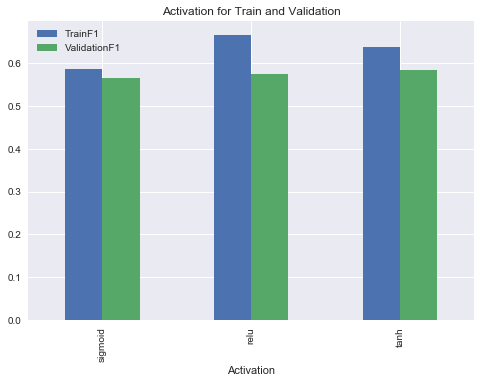

In [60]:
# plt.style.use('seaborn')

# plt.bar(mlp_df_act['Activation'], mlp_df_act['TrainF1'], label = 'Training Score')
# plt.bar(mlp_df_act['Activation'], mlp_df_act['ValidationF1'], label = 'Validation Score')
# plt.ylabel('F1 Score', fontsize = 14)
# plt.xlabel('Activation', fontsize = 14)

# plt.legend()
import matplotlib.pyplot as plt

mlp_df_act.plot(x='Activation', y=['TrainF1','ValidationF1'], kind="bar")
plt.title('Activation for Train and Validation')
plt.show()

# Final Model with Best Attributes

In [74]:
from keras import backend as K
optimizer_value = keras.optimizers.Adam(learning_rate=0.01)
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

scores_final_train =[]
scores_final_train = pd.DataFrame()

model = Sequential()
model.add(Dense(33, input_dim=33, activation='tanh'))
model.add(Dense(28, activation='tanh'))
model.add(Dense(28, activation='tanh'))
model.add(Dense(1,activation = 'sigmoid'))
# Compile model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

# Train_model

# Fit the model
model.fit(mlp_x_train, mlp_y_train, epochs=50,batch_size = 200,verbose=0)
# evaluate the model
# scores_final_train = model.evaluate(mlp_x_train, mlp_y_train, verbose=0)
pred_train = model.predict_classes(mlp_x_train)
# scores_act_train = classification_report(mlp_y_train,pred_train)
# scores_final_train = pd.DataFrame(scores_final_train)
# scores_final_train = scores_final_train.T
# scores_final_train.columns = ['Loss','Accuracy','F1 Score','Precision ','Recall']

# # Print Scores
# print("Train Measures")
# print(scores_final_train)
print("Train Classification Report")
print(classification_report(mlp_y_train,pred_train))

Train Classification Report
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      7000
           1       0.75      0.53      0.62      5194

    accuracy                           0.73     12194
   macro avg       0.73      0.70      0.70     12194
weighted avg       0.73      0.73      0.72     12194



In [73]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

scores_final_test =[]
scores_final_test = pd.DataFrame()
model = Sequential()
model.add(Dense(33, input_dim=33, activation='tanh'))
model.add(Dense(28, activation='tanh'))
model.add(Dense(28, activation='tanh'))
model.add(Dense(1,activation = 'sigmoid'))
# Compile model
model.compile(loss= 'binary_crossentropy', optimizer='adam')

# Fit the Model
model.fit(mlp_x_train, mlp_y_train, epochs=50,batch_size = 200,verbose=0)
# evaluate the model
# scores_final_test = model.evaluate(mlp_x_test, mlp_y_test, verbose=0)
# scores_final_test = pd.DataFrame(scores_final_test)
# scores_final_test = scores_final_test.T
# scores_final_test.columns = ['Loss','Accuracy','F1 Score','Precision ','Recall']

# print("Test Measures")
# print(scores_final_test)
pred_test = model.predict_classes(mlp_x_test)
print("Test Classification Report")
print(classification_report(mlp_y_test,pred_test))
print(f1_score(mlp_y_test,pred_test))
print(confusion_matrix(mlp_y_test,pred_test))

Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      8670
           1       0.42      0.50      0.46      2257

    accuracy                           0.75     10927
   macro avg       0.64      0.66      0.65     10927
weighted avg       0.77      0.75      0.76     10927

0.45602736969209096
[[7091 1579]
 [1124 1133]]


In [80]:
print("      Confusion Matrix")
print(pd.DataFrame(confusion_matrix(mlp_y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))


      Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         7091         1579
Actual 1         1124         1133


In [50]:
model = Sequential()
model.add(Dense(33, input_dim=33, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(28, activation='sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
# Compile model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
# Fit the model
history = model.fit(mlp_x_train, mlp_y_train,validation_split=0.33, epochs=400,batch_size = 200,verbose=0)
# temp3 = scores_final_train = model.evaluate(mlp_x_train, mlp_y_train, verbose=0)

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


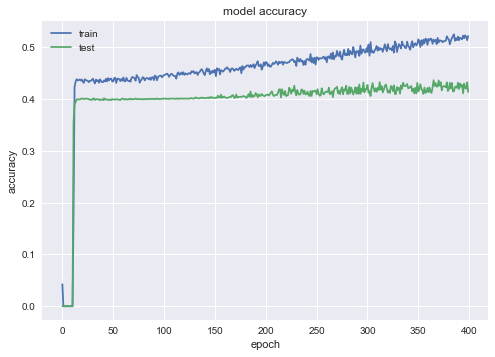

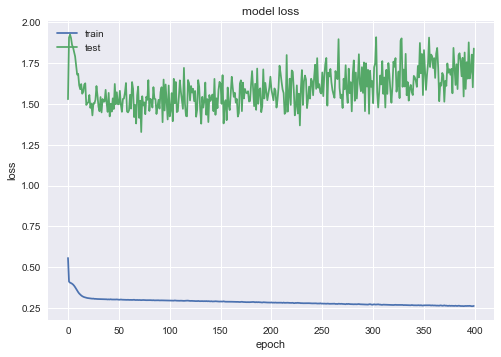

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# KNN

In [82]:
X_train = x_s_train.copy()
y_train = y_s_train.copy()
X_test = x_test.copy()
y_test = y_test.copy()

# Experiment with Neighbors

In [207]:
from sklearn.model_selection import cross_val_score

# neighbors = [1,2,3,4,5,6,7,8]
neighbor_acc_df = pd.DataFrame()
score_list = []
for neighbor in range(1,100):
    model = KNeighborsClassifier(n_neighbors=neighbor)
    scores = cross_val_score(model, X_train, y_train, cv=3,scoring ='f1')
    print(neighbor, scores.mean())
    scores_knn = scores.mean() 
    score_list.append(scores_knn)
    values_knn  =  [neighbor, scores_knn]
    values_knn = pd.DataFrame(values_knn).T
    neighbor_acc_df = pd.concat([neighbor_acc_df,values_knn])

1 0.5822878516259112
2 0.5151090356173137
3 0.5769246356203196
4 0.5297563199771059
5 0.5613814322702946
6 0.524104045574668
7 0.5547470557623025
8 0.5195074408484155
9 0.5530501363219703
10 0.525052634865141
11 0.551877497188039
12 0.5219226950514447
13 0.5428068523595343
14 0.517820181225035
15 0.5401683269578416
16 0.5160462769218617
17 0.5348704036183314
18 0.5159497628511436
19 0.5355152921058641
20 0.5148711044910778
21 0.5354810587725085
22 0.5148973509263882
23 0.5325816549646726
24 0.5110616726710379
25 0.5300581969809429
26 0.5107234219461818
27 0.5303058497074927
28 0.5124180363834753
29 0.5267128769981042
30 0.5118301908381026
31 0.526796166652784
32 0.5141296485368789
33 0.5263717453243303
34 0.5142030009172228
35 0.5254454302220329
36 0.510224101113535
37 0.5208588091391713
38 0.5090341258317771
39 0.5194660879460025
40 0.506344598569421
41 0.5173324587372133
42 0.5034999828294703
43 0.5135057964544408
44 0.5037123909381357
45 0.5145482388973966
46 0.5039870104682861
47 0

In [214]:
neighbor_acc_df.columns = ['Neigbors','Accuracy']

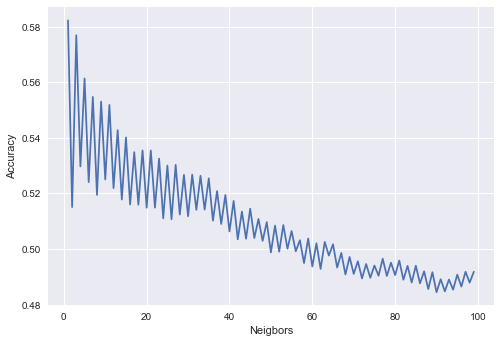

In [283]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
plt.style.use('seaborn')
svm_ax_lin=sns.lineplot(data=neighbor_acc_df ,x='Neigbors', y='Accuracy', legend='full', palette = flatui)

# plt.annotate("Best Neighbour",fontsize=16,xy=(3 0.5769246356203196),xytext=(2.60, 0.58), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="yellow",edgecolor="black",linestyle='--',linewidth=2))

# svm_ax_lin.set(ylim=(0.7, 0.9))
plt.show()

# Experiment with Distance and Neighbours

In [216]:
from sklearn.model_selection import cross_val_score

# neighbors = [1,2,3,4,5,6,7,8]
distance_neighbor_df = pd.DataFrame()
distance_metrics_list = ['chebyshev','minkowski','manhattan']
for distance_metric in distance_metrics_list:
    for neighbor in range(1,11):
        model = KNeighborsClassifier(n_neighbors=neighbor,metric = distance_metric)
        scores = cross_val_score(model, X_train, y_train, cv=3,scoring = 'f1')
#     print(neighbor, scores.mean())                          
        values  =  [distance_metric,neighbor,scores.mean()]
        values = pd.DataFrame(values).T
        distance_neighbor_df = pd.concat([distance_neighbor_df,values])

distance_neighbor_df.columns = ['DistanceMetric','Neighbor','Accuracy']
distance_neighbor_df['Neighbor'] = distance_neighbor_df['Neighbor'].astype(float)
distance_neighbor_df['Accuracy'] = distance_neighbor_df['Accuracy'].astype(float)

In [219]:
distance_neighbor_df

,DistanceMetric,Neighbor,Accuracy
0,chebyshev,1.0,0.581490
0,chebyshev,2.0,0.517210
0,chebyshev,3.0,0.572282
0,chebyshev,4.0,0.527180
0,chebyshev,5.0,0.564558
0,chebyshev,6.0,0.522160
0,chebyshev,7.0,0.557764
0,chebyshev,8.0,0.517966
0,chebyshev,9.0,0.544663
0,chebyshev,10.0,0.516959


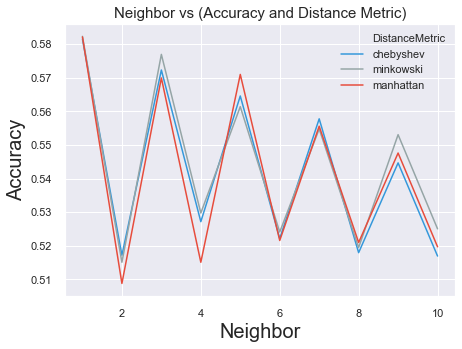

In [286]:
import seaborn as sns
flatui = ["#3498db", "#95a5a6", "#e74c3c"]
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(data=distance_neighbor_df, x='Neighbor', y='Accuracy',hue='DistanceMetric',palette=flatui)
plt.xlabel("Neighbor",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Neighbor vs (Accuracy and Distance Metric)",fontsize=15)
plt.show()

# Best Attributes Model

In [223]:
model = KNeighborsClassifier(n_neighbors=3,metric = 'minkowski')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("------------------Classification Report-----------------------")
print("")
print(classification_report(y_test, y_pred))

------------------Classification Report-----------------------

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      8670
           1       0.35      0.55      0.43      2257

    accuracy                           0.69     10927
   macro avg       0.60      0.64      0.61     10927
weighted avg       0.76      0.69      0.72     10927



# Learning Curve

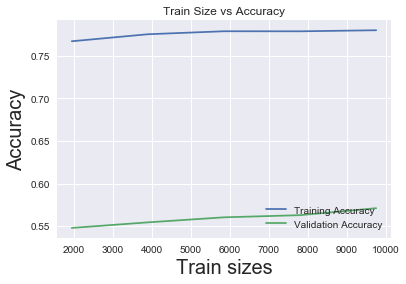

In [84]:
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=3), 
    X_train, y_train,train_sizes=[0.2,0.4,0.6,0.8,1],cv=5,random_state=1,shuffle=True,scoring ='f1')

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)



In [87]:
valid_mean

array([0.54779047, 0.55432911, 0.56024889, 0.56278861, 0.57097732])

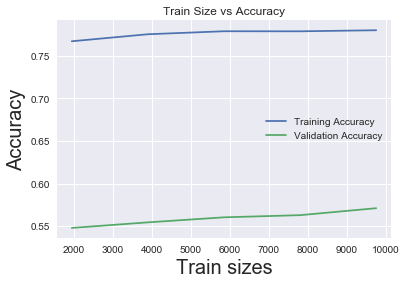

In [88]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, valid_mean, label = 'Validation Accuracy')
plt.xlabel("Train sizes",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Train Size vs Accuracy")
plt.legend(loc="center right")
plt.show()